In [12]:
import sys
sys.path.append('.')
from audio_preprocessing import *
import librosa
import librosa.display
import torch

In [13]:
test_audio_file = "/Users/keegz_dsouza/Documents/Code/FINAL/Voice-Cloning/datasets/LibriSpeech/train-clean-100/19/198/19-198-0000.flac"
original_waveform, original_sr = librosa.load(test_audio_file, sr=None, mono=True)
processed_waves = preprocess_audio(torch.tensor(original_waveform), original_sr)

# Waveform Plot
1. **Check for clipping** *(if values hit ±1.0, though your normalized max/min are safe at ±0.2)*
2. **Verify trimming:** Does the waveform start/end abruptly? *(Good for detecting over-trimming.)*

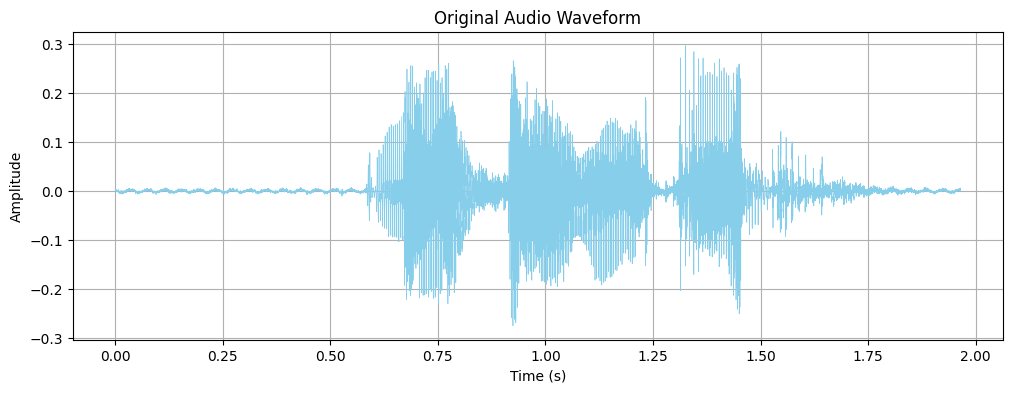

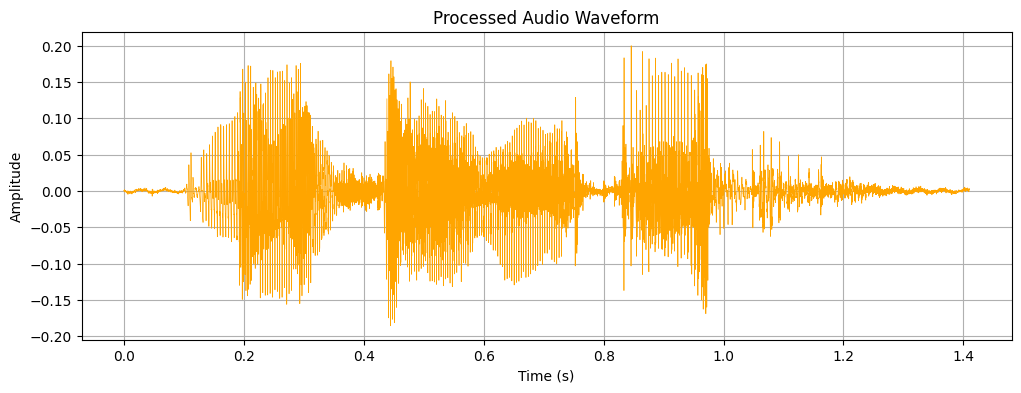

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_waveform(waveform, sr, colour, title):
    time = np.arange(0, len(waveform)) / sr
    plt.figure(figsize=(12, 4))
    plt.plot(time, waveform, linewidth=0.5, color=colour) 
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_waveform(original_waveform, original_sr, 'skyblue', "Original Audio Waveform") 
plot_waveform(processed_waves, original_sr, 'orange', "Processed Audio Waveform") 

# Amplitude Distribution Histogram
1. **Confirm normalization:** Values should cluster near 0 with symmetric distribution.
2. Detect **bias** *(e.g., shifted mean)* or **skewness** *(asymmetry)* that might affect downstream tasks.

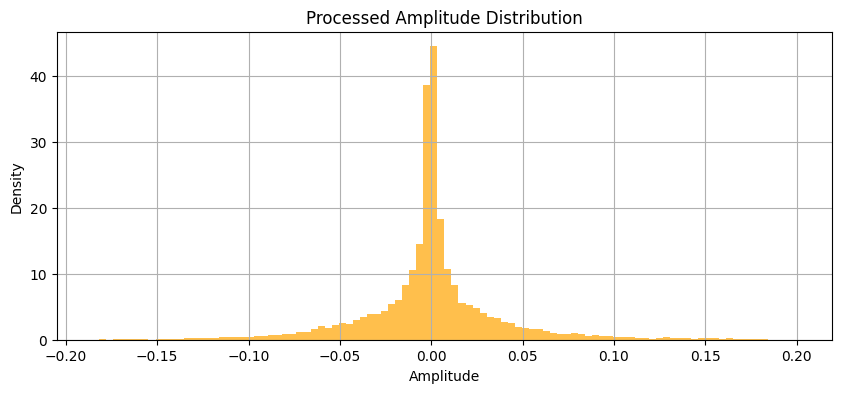

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_amplitude_histogram(waveform, colour, title):
    plt.figure(figsize=(10, 4))
    plt.hist(waveform, bins=100, alpha=0.7, color=colour, density=True)
    plt.xlabel("Amplitude")
    plt.ylabel("Density")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_amplitude_histogram(processed_waves, 'orange', "Processed Amplitude Distribution")

# Zoomed-In Waveform Segment
1. Check for **quantization noise** *(unnatural stair-step patterns)*

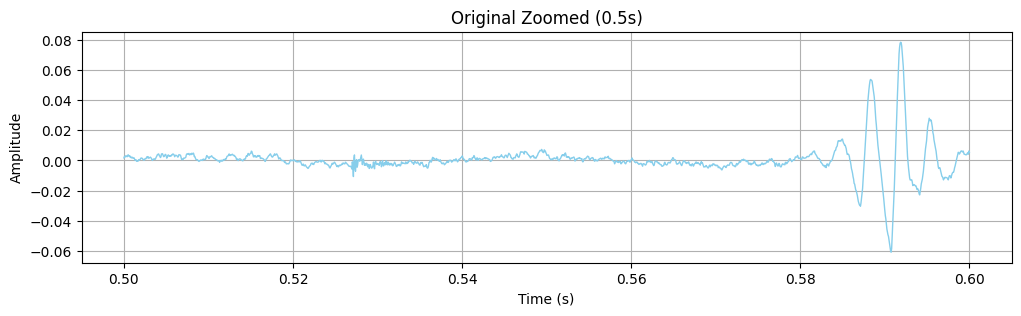

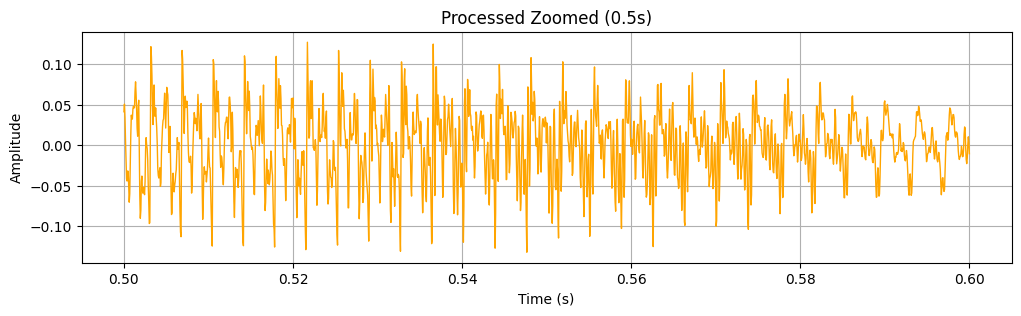

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_zoomed_waveform(waveform, sr, start_time, colour, title):
    start_sample = int(start_time * sr)
    segment = waveform[start_sample : start_sample + int(0.1 * sr)]  # 0.1-second segment
    time = np.linspace(start_time, start_time + 0.1, len(segment))

    plt.figure(figsize=(12, 3))
    plt.plot(time, segment, linewidth=1, color=colour)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_zoomed_waveform(original_waveform, original_sr, 0.5, 'skyblue', "Original Zoomed (0.5s)")
plot_zoomed_waveform(processed_waves, original_sr, 0.5, 'orange', "Processed Zoomed (0.5s)")